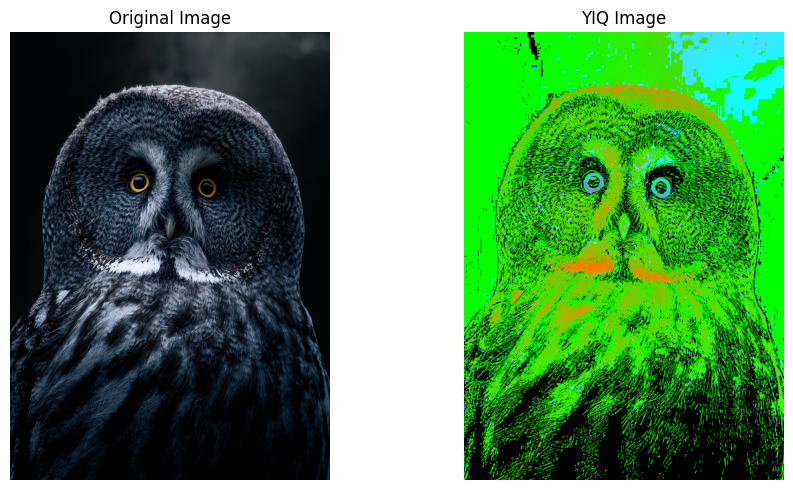

YIQ image saved as yiq_image.jpg


In [1]:
# rgb_to_yiq.py

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def rgb_to_yiq(input_path, output_path):
    img = Image.open(input_path)  # Open the image
    img_array = np.array(img)

    # Normalize RGB values to [0, 1]
    img_array = img_array / 255.0
    
    # Define the RGB to YIQ transformation matrix
    transformation_matrix = np.array([[0.299,  0.587,  0.114],
                                      [-0.5957, -0.2744,  0.3213],
                                      [0.2113, -0.5226,  0.3116]])

    # Apply the transformation to RGB
    yiq_array = np.dot(img_array[...,:3], transformation_matrix.T)

    # Extract Y, I, Q channels
    Y = yiq_array[:,:,0]
    I = yiq_array[:,:,1]
    Q = yiq_array[:,:,2]

    # Stack Y, I, Q to create YIQ image
    yiq_img_array = np.stack([Y, I, Q], axis=-1)

    # Convert the YIQ array to an image (in [0, 255] scale for each component)
    yiq_img = Image.fromarray((yiq_img_array * 255).astype(np.uint8))

    # Save the output image
    yiq_img.save(output_path)

    # Display original and YIQ images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(yiq_img)
    plt.title("YIQ Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"          
    output_path = "yiq_image.jpg"  
    rgb_to_yiq(input_path, output_path)
    print(f"YIQ image saved as {output_path}")
